## <font color=green> *FACTS GMD:* <font color=black> Figure 5 </font>
#### <font color=blue> *Projected New York City RSL contributions from the Greenland ice sheet, the Antarctic ice sheet, glaciers, and sterodynamic sea level from different FACTS modules under SSP1-2.6 and SSP5-8.5* </font>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import netCDF4 as nc
from pandas.plotting import table 
import xarray as xr
from datetime import date
import os

### <font color=blue> List of **Modules** and **Data** to be used </font>

In [2]:
# Load FACTS module names/data as a dataframe.
df = pd.read_fwf('001_input_Names_Modules_dataFILES/Fig5_IP_module-submod-dataFILE_LOCAL.txt',comment = '#')
df

,Component,Module,subModule,DataFile
0,Glaciers,ipccar5,glaciers,ar5glaciers.ipccar5.glaciers_localsl.nc
1,Glaciers,emulandice,glaciers,emuglaciers.emulandice.glaciers_localsl.nc
2,GrIS,FittedISMIP,GrIS,GrIS1f.FittedISMIP.GrIS_GIS_localsl.nc
3,GrIS,emulandice,GrIS,emuGrIS.emulandice.GrIS_localsl.nc
4,GrIS,bamber19,icesheets,bamber19.bamber19.icesheets_GIS_localsl.nc
5,AIS,emulandice,AIS,emuAIS.emulandice.AIS_localsl.nc
6,AIS,larmip,AIS,larmip.larmip.AIS_localsl.nc
7,AIS,deconto21,AIS,deconto21.deconto21.AIS_AIS_localsl.nc
8,AIS,bamber19,icesheets,bamber19.bamber19.icesheets_AIS_localsl.nc
9,TE,tlm,sterodynamics,ocean.tlm.sterodynamics_localsl.nc


### <font color=blue>Extract **.nc** data \& Find Percentiles</font>

In [3]:
import fig_ncTOdf as IP
#
EXPDATE   = 221217                    # Experiment date.
SCENARIO  = ['ssp126','ssp585'];                           
#        
df_ptile = IP.module_Fig_nc(df,SCENARIO,EXPDATE,2100)
#
display(df_ptile)

,Component,Module,subModule,SSP,Year,col_50,col_5,col_17,col_83,col_95
0,Glaciers,ipccar5,glaciers,ssp126,2020,0.017,0.012,0.014,0.020,0.02200
1,Glaciers,ipccar5,glaciers,ssp126,2030,0.024,0.016,0.019,0.030,0.03300
2,Glaciers,ipccar5,glaciers,ssp126,2040,0.032,0.020,0.025,0.040,0.04500
3,Glaciers,ipccar5,glaciers,ssp126,2050,0.039,0.024,0.030,0.051,0.05800
4,Glaciers,ipccar5,glaciers,ssp126,2060,0.047,0.027,0.035,0.062,0.07100
...,...,...,...,...,...,...,...,...,...,...
193,VLM,kopp14,verticallandmotion,ssp585,2060,0.083,0.075,0.078,0.088,0.09100
194,VLM,kopp14,verticallandmotion,ssp585,2070,0.098,0.089,0.093,0.104,0.10800
195,VLM,kopp14,verticallandmotion,ssp585,2080,0.113,0.102,0.107,0.120,0.12400
196,VLM,kopp14,verticallandmotion,ssp585,2090,0.128,0.116,0.121,0.136,0.14100


## <font color=green> Plot: GMSL contribution from Icesheets, Glaciers and TE </font>

#### Global Def

In [4]:
color_emulandice = np.array([0, 173,207])/255
color_FittedISMIP = np.array([23  ,60 ,  102])/255
color_ipccar5 = np.array([231 ,29 ,  37])/255
color_larmip = np.array([149 ,27 ,  30])/255
color_deconto21 = np.array([23  ,60 ,  102])/255
color_tlm = np.array([247 ,148,  32])/255
color_kopp14 = np.array([231 ,29 ,  37])/255
#
# Components.
GrIS      = [ 'GrIS-FittedISMIP','GrIS-emulandice']
AIS       = ['AIS-larmip','AIS-emulandice','AIS-deconto21',]
Glaciers  = ['Glaciers-ipccar5-GMIP2','Glaciers-emulandice']
SD        = ['TE-tlm','VLM-kopp14']
component = ['GrIS','AIS','Glaciers','SD']

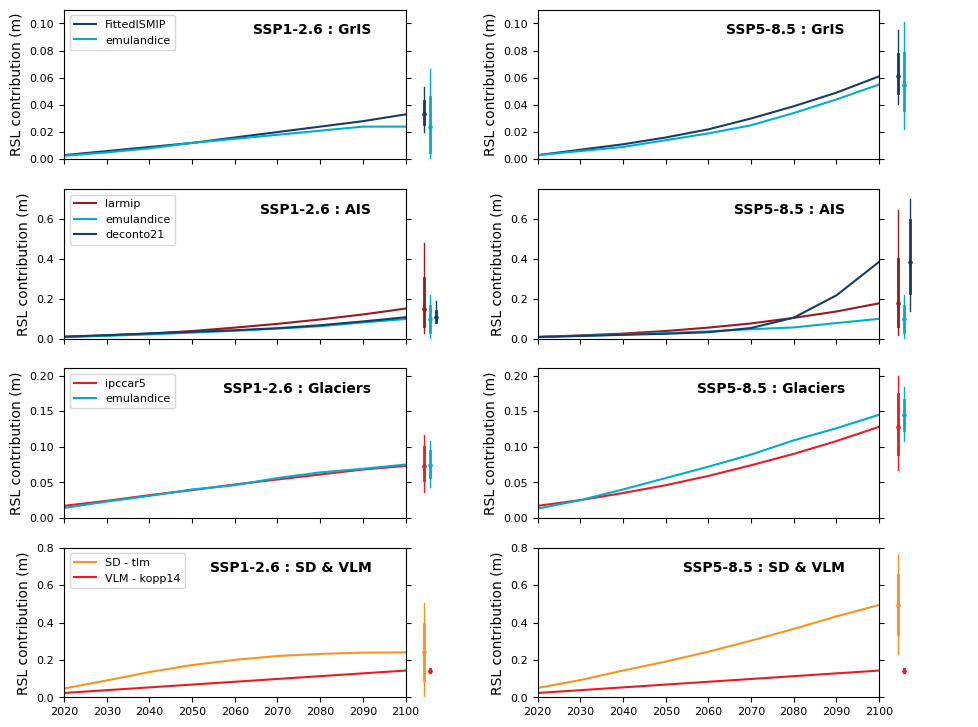

In [5]:
# Set global figure size and dots per inch
plt.rcParams.update({'figure.figsize':(30,25), 'figure.dpi':100})
#
# Initialize the grid
grid = plt.GridSpec(4, 5, wspace=0.1, hspace=-.4)
grid00 = grid[0].subgridspec(4, 5)
grid01 = grid[1].subgridspec(4, 5)
#
XAX1        = df_ptile.loc[:,"Year"].unique()
SSP         = df_ptile.loc[:,"SSP"].unique()
module      = df_ptile.loc[:,"Module"].unique()
#
xlim    = [2020,2100]
xlim1   = [.1,2]
#
# Subplot Axis.
ax1_GrIS     = plt.subplot(grid00[0, :4]); ax2_GrIS     = plt.subplot(grid00[0, 4]);
ax1_AIS      = plt.subplot(grid00[1, :4]); ax2_AIS      = plt.subplot(grid00[1, 4]);
ax1_Glaciers = plt.subplot(grid00[2, :4]); ax2_Glaciers = plt.subplot(grid00[2, 4]);
ax1_SD       = plt.subplot(grid00[3, :4]); ax2_SD       = plt.subplot(grid00[3, 4]);
#
ax3_GrIS     = plt.subplot(grid01[0, :4]); ax4_GrIS     = plt.subplot(grid01[0, 4]);
ax3_AIS      = plt.subplot(grid01[1, :4]); ax4_AIS      = plt.subplot(grid01[1, 4]);
ax3_Glaciers = plt.subplot(grid01[2, :4]); ax4_Glaciers = plt.subplot(grid01[2, 4]);
ax3_SD       = plt.subplot(grid01[3, :4]); ax4_SD       = plt.subplot(grid01[3, 4]);
#
for ss in SSP: # Loop through each SSP
    for copnt in component:
        # Select subplot axis based on workflow
        if ss == 'ssp126': 
            ax1 = eval(f'ax1_{copnt}');    ax2 = eval(f'ax2_{copnt}')
        elif ss == 'ssp585':
            ax1 = eval(f'ax3_{copnt}');    ax2 = eval(f'ax4_{copnt}')
        # X axis for the Right (Bar) Plot.
        XAX2 = np.array([[.2,.2]]) 
        yylim = []
        #
        # Plot Left 
        # Within a single sub-plot, Loop over individual Components.
        for co in np.arange(len(eval(copnt))):                 # Index of elements within each workflow (e.g. GrIS-emulandice)
            CoMpOnEnT   = (eval(copnt)[co]).split('-')[0]      # e.g. GrIS
            MoDuLe      = (eval(copnt)[co]).split('-')[1]      # e.g. emulandice
            Yax1        = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe)),"col_50" ] #Glacier
            #
            # Set Legend Labels
            if copnt=='SD' and CoMpOnEnT=='TE':     
                LABEL = 'SD'+f' - {MoDuLe}';
            elif copnt=='SD' and CoMpOnEnT=='VLM':  
                LABEL = f'{CoMpOnEnT} - {MoDuLe}'; 
            else:                                   
                LABEL = f'{MoDuLe}';
            ax1.plot(XAX1, Yax1, label = LABEL, color = eval(f'color_{MoDuLe}'))
            #
            # Plot Right
            Yax2_1 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_5", "col_95") ].values
            Yax2_2 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_17", "col_83") ].values 
            Yax2_3 = df_ptile.loc[((df_ptile['SSP'] == ss) & (df_ptile["Component"] == CoMpOnEnT) & (df_ptile['Module'] == MoDuLe) & (df_ptile['Year'] == 2100)),("col_50","col_50") ].values 
            #
            ax2.plot(XAX2.transpose(), Yax2_1.transpose(), label = f'{MoDuLe}', color = eval(f'color_{MoDuLe}'),linewidth=1)
            ax2.plot(XAX2.transpose(), Yax2_2.transpose(), label = f'{MoDuLe}', color = eval(f'color_{MoDuLe}'),linewidth=2)
            ax2.plot(XAX2.transpose(), Yax2_3.transpose(), marker = 'o', color = eval(f'color_{MoDuLe}'),ms = 2,mfc='none')
            XAX2 = XAX2+.15
            #
            # Dynamix y axis
            yylim.append( Yax2_1[0] )
            #
        ylim =[0, 0.05 + np.max(np.unique(np.array(yylim)))]
        #
        # Use Common Yaxis limits across panels.
        if copnt == 'GrIS':  ylim =[0, 0.11]
        if copnt == 'AIS':  ylim =[0, 0.75]
        if copnt == 'Glaciers':  ylim =[0, 0.21]
        if copnt == 'SD':  ylim =[0, 0.8]
        #
        ax1.tick_params(axis='both', labelsize=8)
        ax1.yaxis.set_ticks_position('both')
        if ss=='ssp126': ax1.legend(loc='upper left',prop={'size': 8}); 
        ax1.set_xlim(xlim); ax1.set_ylim(ylim)
        ax1.set_ylabel("RSL contribution (m)"); #ax1.grid()
        if copnt == 'SD': subPLT = ss[:3].upper()+ss[3]+'-'+ss[4]+'.'+ss[5]+' : SD & VLM'
        else:             subPLT = ss[:3].upper()+ss[3]+'-'+ss[4]+'.'+ss[5]+' : ' + copnt
        ax1.text(.9, .91, subPLT, horizontalalignment='right',verticalalignment='top',weight='bold',fontsize=10,transform=ax1.transAxes)
        if copnt != 'SD': ax1.xaxis.set_ticklabels([])
        ax2.set_ylim(ylim); ax2.axis('off'); ax2.set_xlim(xlim1);
# Get todays date.
today = date.today().strftime('%Y-%m-%d')
# Save Figure.
figureNAME = "Fig5-"+today+".pdf" 
if os.path.exists(figureNAME): os.remove(figureNAME)
plt.savefig(figureNAME, format="pdf", bbox_inches="tight")
# 
plt.show()